## 1. Basics
### 1.1 Is it stationary?
Probably Not!
To be stationary, these 3 things must be true
1. The mean of the series should not be a function of time
    1. graph looks like it goes up over time
2. The variance of the series should not be a function of time
    1. homoscedasticity
    2. graph looks like the amplitude changes over time
3. The covarience of the ith term and the (i + m)th term should not be a function of time.
    1. graph looks like the period changes over time

Before you can really do any work with time series data, you have to first transform it into stationary function

### 1.2 Random Walk
The example: someone is walking on a giant chess board. Their next position only depends upon their last position.
Trying to predict where they are on the chess board becomes harder the more steps she takes.
- At t=0 you will know exactly where she is, your guess is P(1)
- At t=1 there are 8 possibilities of where she is is P(1/8)
- A model of this equation is:

$x(t) = x(t-1) + e(t)$
    

- In words, this is the position of the person at any time t, and is a function of their position at the previous time t plus an error
- e(t) is the error at time point t. This is the "randomness" that increases with every t.
- If we recursively try and fit in all of the x's, we will end up with:

$x(t) = x(0) + \sum_{1}^{t}e(t)$
  

- Is this function stationary? Lets check:

    - Mean: 
    
$E(x(t)) = E(x(0)) + \sum_{1}^{t}E(e(t))$
        
        
- Since we know the Expectation of any Error will be 0, the mean of the function is constant. This is simply because the error can be positive or negative, which averages out to 0

    
    - Varience:
    
$V(x(t)) = V(x(0)) + \sum_{1}^{t}V(e(t))$

$V(x(t)) = t * V(e)$
      

- The variance is time dependent. Therefor Random Walk is non-stationary process.

- Let's add a new coefficient into the equation and see if we can make the function stationary:

$X(t) = P * X(t-1) + e(t)$

- If we start by assuming P = 0, then the position X is strictly driven by the error term, which always averages out to 0
- As we increase P, the period in which position X = 0 increases further and further, but still averages out to 0.
- This is because (disregarding e) the next step X(t) will always be a fraction of the previous step X(t-1)
- But once P = 1, the only thing that makes X(t) approach zero is the random e term, but it's totally random, so the model "breaks"


### 1.3 Dickey Fuller Test of Stationarity
- That test we just did was basically it, here's the real version:

$X(t) - X(t-1) = (P-1) * X(t-1) + e(t)$

- To test for Stationarity, we need to test that (P-1) is significantly different than 0 or not

$H_0: (P-1)=0$

$H_1: (P-1)!=0$

- If the null hypothesis is rejected, then we have a stationary time series. 

## 2. Exploring with Data in R
Loading the Data set: An example data set of monthly totals of international airline passengers from 1949 - 1960

In [1]:
library(tseries)

data(AirPassengers)
# This tells you the class: ts
class(AirPassengers)
# This tells you where the time series starts, ends, and it's frequency
start(AirPassengers)
end(AirPassengers)
frequency(AirPassengers)
# The summary of the ts
summary(AirPassengers)

aps <- AirPassengers

[1] "ts"

[1] 1949    1

[1] 1960   12

[1] 12

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

Lets looks at the number of passengers over time:

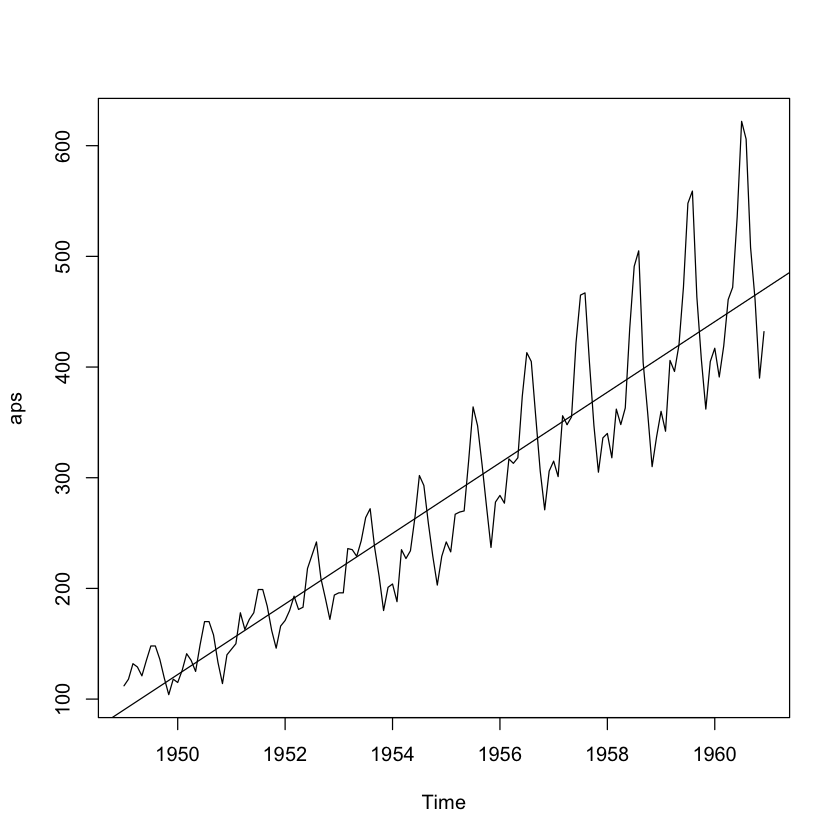

In [2]:
plot(aps)
# This fits a linear regression model
abline(reg=lm(aps~time(aps)))

A few other things to look at:

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949   1   2   3   4   5   6   7   8   9  10  11  12
1950   1   2   3   4   5   6   7   8   9  10  11  12
1951   1   2   3   4   5   6   7   8   9  10  11  12
1952   1   2   3   4   5   6   7   8   9  10  11  12
1953   1   2   3   4   5   6   7   8   9  10  11  12
1954   1   2   3   4   5   6   7   8   9  10  11  12
1955   1   2   3   4   5   6   7   8   9  10  11  12
1956   1   2   3   4   5   6   7   8   9  10  11  12
1957   1   2   3   4   5   6   7   8   9  10  11  12
1958   1   2   3   4   5   6   7   8   9  10  11  12
1959   1   2   3   4   5   6   7   8   9  10  11  12
1960   1   2   3   4   5   6   7   8   9  10  11  12

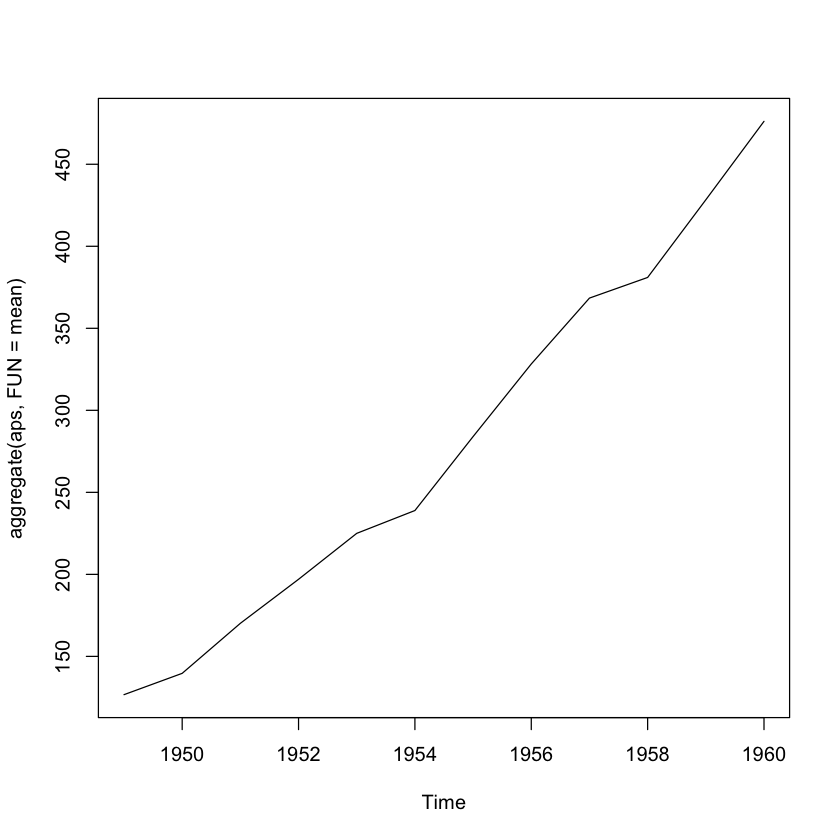

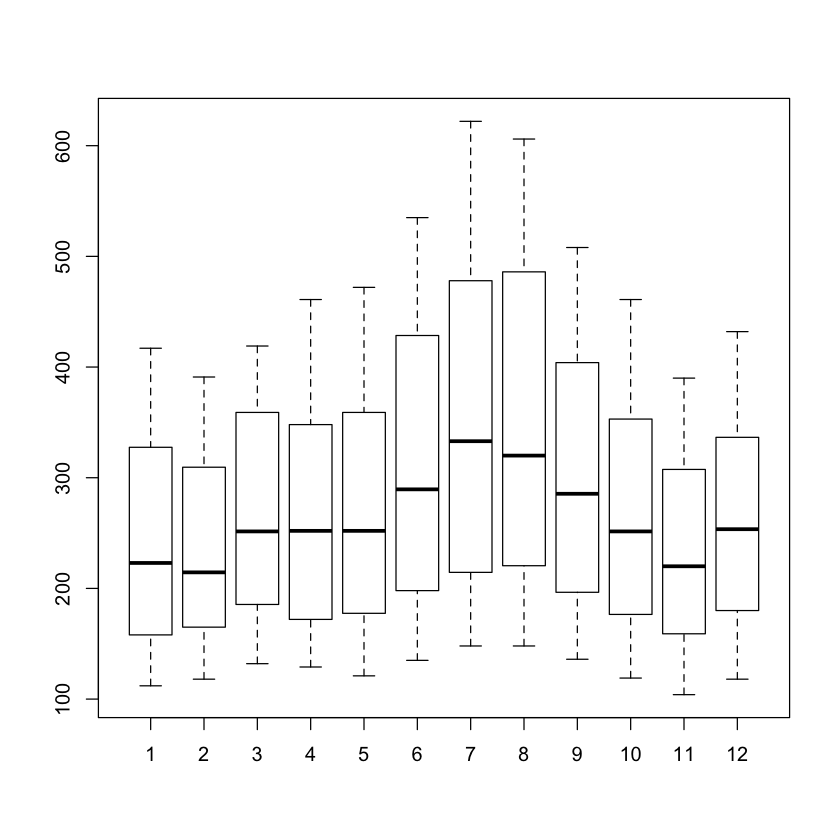

In [3]:
# Prints the cycles:
cycle(aps)
# Aggregates the cycles and displays a year by year trend
plot(aggregate(aps, FUN=mean))
# Box plot of each month to show seasonal effects
boxplot(aps~cycle(aps))

#### Some Inferences we can make:
1. The aggregated graph shows there is a clear trend in passengers increase year to year
2. The varience and the mean value in months 7 and 8 are the highest
3. The mean changes throughout the year, but the varience stays about the same

## 3. ARMA Time Series Modeling
AR: Auto Regression

MA: Moving Average

### 3.1 Auto Regression
Using a countries GDP as an example. If we assume that the GDP, $X(t)$, is dependent upon last years GDP, $X(t-1)$:

$X(t) = alpha * X(t-1) + e(t)$

is known as the AR(1) formulation. The 1 denotes that the next instance is soley dependant on the previous isntance (since we assume the error averages out to 0).
Note that $X(t-1)$ is related to $X(t-2)$ in an indentical fasion. Thus any "shock" to $X(t)$ will eventually fade away.

For example, if $X(t)$ is the nuber of juice botles sold in a city on a particular day:
If one day in winter the temperature spikes, and 1000 bottles are sold, then the next day the sales do not immediately drop to 0. Instead we can assume that the following day the sales will be at 50%, the next at 25% and so forth until they are back to where they start. This signifies an alpha value of 0.50, and is known as the intertia property of an Auto Regressive series.

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/AR1.png">

### 3.2 Moving Average Time Series
Using the same juice example: buisness is bad so no juice is being sold. The owner creates a new type of juice that everyone is crazy about. He is able to sell out his entire stock of 1000 juices, $x(t)$. Demand was so high that stock runs out. As a result, ~100 people could not purchase the juice. After the intial sell out, the juice lost it's "woo factor" and demand was back at 0, but the gap of customers from before are still there there. This gap is $e(t)$. This example follows the forumula:

$X(t) = beta * e(t-1) + e(t)$

In this scenario, the sales dies out much faster compared to the AR model

<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2015/02/MA1.png">

### 3.3 Differences between AR and MA
The primary difference is the correlation between the time series objects at differnet points in time. 
The correlation between $x(t)$ and $x(t-n)$ for $n > 0$ in a MA model is alwasy zero $(E(e(t) = 0)$. Howover, the correlation of $x(t)$ and $x(t-n)$ gradually declines as n -> infinity in the AR model. We can exploit these differneces to our advantage.

### Exploitng ACF and PACF
Answer these two question:
1. Is it an AR or MA process?
2. What order of AR or MA processes do we need to use?

The answer to number 1 can be found using the Total Correcaltion Chart, or Auto Correlation Function (ACF). 
ACF is a plot of the total correlation between different lag function. For example, we are interested in the correlation between the GDP $x(t), x(t-1), ... x(t-n)$.

In a MA series, there is no correlation between $x(t)$ and $x(t-n-1$). So the ACF cuts off at the nth lag. 
In an AR series, we look at the partial correlation. It will cut off after the nth degree for an AR

In a AR series, we look at the partial correlation of each lag. The trick is that the partial lag will cut off after the degree of the AR series. For example, for an AR(1) series (like the juice sales), if we exclude the 1st lag $(X(t-1))$, then the second lag $(X(t-2))$ is INDEPENDANT of $X(t)$. So the PARTIAL correlation function (PACF) drops sharply after the 1st lag.

## Examples:
### ACF
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Gradual-decline.gif">

### PACF
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/cut-off.gif">

The blue line represents values significantly differnet than zero. The first "cutoff" value we see in these graphs is in the graph of the PACF function, and is at a lag of 2. From this, we can say that this is most likely an AR(2) process.

### ACF
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/cut-off.gif">

### PACF
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Gradual-decline.gif">

Here, the first "cutoff" we see is in the graph of the ACF fucntion, and is at a lag of 2. From this, we can say that this is most likely a MA(2) function.

## Low level summary by John:
If the ACF graph is not Auto-regressive, it's probably a MA function. If the ACF graph is Aut-regressive but the PACF is not, then it's probably a AR function. 

## 4. ARIMA Time Series Modeling
Now we've learnt the basics of TS modleing, TS in R, and ARMA modeling. 
Next will be a step by step of "How to do a Time Series Analysis." 
The steps are as follows:

### 4.1. Visualize the TS
1. Anaylyze the trends prior to building any kind of ts models. 
2. Interesting in any trend, seasonality, or random behavior in the series

### 4.2. Stationarize the series
1. Dicky Fuller is the most popular test to check stationality
2. If it's not stationary:
    1. Detrending: remove the tend compenent of the time series.
        1. For example: if the ts is $x(t) = (mean+trend*t)+error$ simple remove the part in the parentheses and build the model for the rest
    2. Differencing: try to model the differences of the terms and not the actual terms.
        1. For example: if the ts is $x(t) - x(t-1) = ARMA (p, q)$,then differencing (the Integration is AR(I)MA) would give us the parameters:
            1. $p:AR$
            2. $d:I$
            3. $q:MA$
    3. Seasonality: more below
            
### 4.3. Plot ACF/PACF chart and find the optimal parameters
1. Find the optimal paramters using the ACF and PACF plots and using our two tricks.
2. Additionally, if both ACF and PACF decrease gradually, this indicate that we need to make the ts stationary and indtoruce a value to "d"
    
### 4.4. Build the ARIMA model
1.  The value found in the prevous section might be an appropraite estiate, and we need to explore more (p, d, q) combinations. The one with the lowest BIC and AIC should be our choice. WE can also try some models with a seasonal component, just in case we notice any seasonality in the ACF/PACF plots. 
    
### 4.5. Make Predictions
1. Now you can make prediction and visualize trends to cross validate in the model is accurate.


## 5. Applications: Airplane Passenger Example

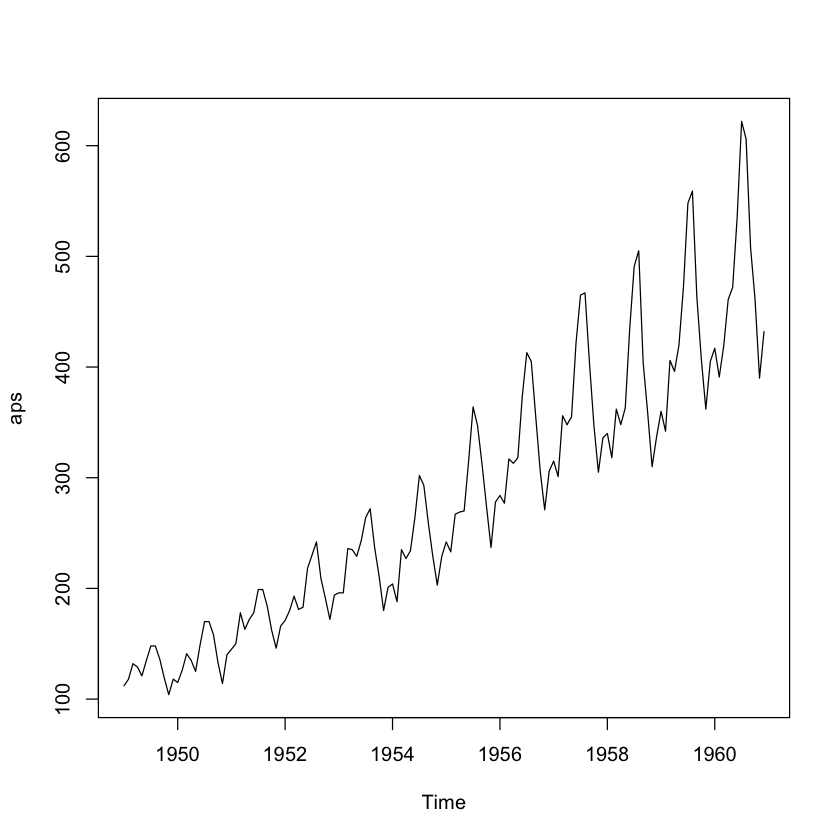

In [4]:
plot(aps)

Initial Observations:
1. There is a trend compenent which grows the passenger year by year
2. There looks to be a seasonal component with a cycle of less than 12 months.
3. The variance in the data increases with time

We will address the unequal varience by using the log of the series. We will address the trend component by taking the difference of the series.

Now we we will do an Augmented Dickey-Fuller Test 

In [10]:
adf.test(diff(log(aps)), alternative="stationary", k=0)

Warning message in adf.test(aps, alternative = "stationary", k = 0):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  aps
Dickey-Fuller = -4.6392, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


Since $p>0.01$, Dickey-Fuller test's null hypothesis is rejected ($H_0: (P-1)=0$). We now know that this series is stationary enough to start modeling.

Since we needed 1 difference tomake the series stationary, we know $d=1$

Now we need to found out the other parameters for the ARIMA modeling using the ACF and PACF plots:

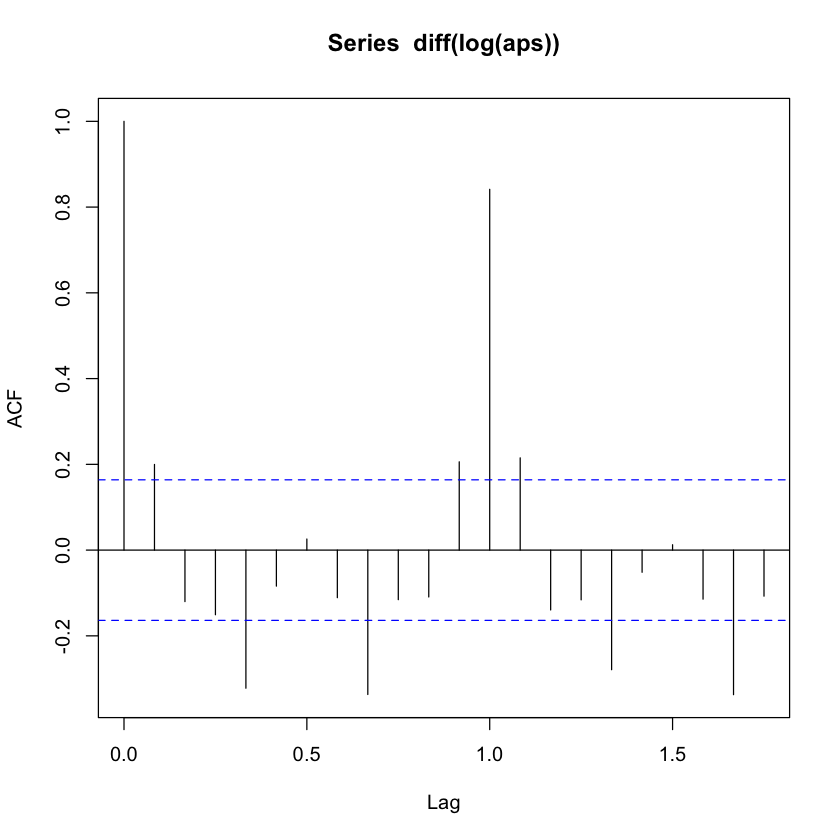

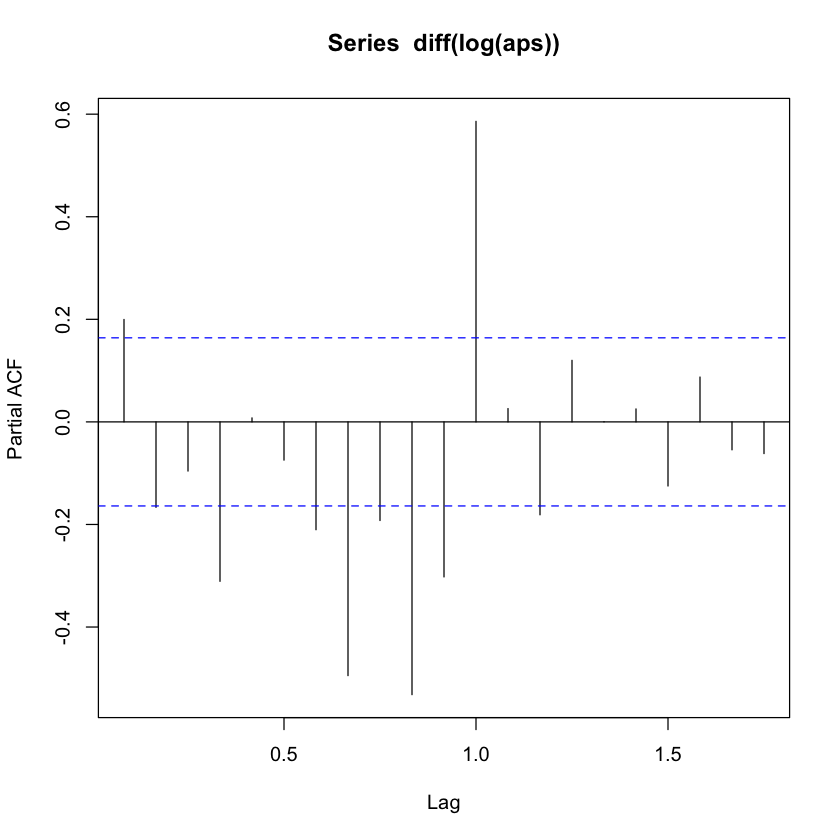

In [26]:
acf(diff(log(aps)))
pacf(diff(log(aps)))

We see that teh ACF plot cutt off after the first lag. This shows the valie of p should be 0 as the ACF is the graph with the cuttoff, and our value of q should be 1 or 2. After a few iteration, we see that $(0,1,1)$ is the combiniation with the least AIC and BIC.

Now we can fit an ARIMA model and make a prediction in 10 years into the future. We will try fitting a seasonal compment into the ARIMA formulation.

In [27]:
fit <- arima(log(aps), 
             c(0,1,1), 
             seasonal = list(order = c(0,1,1), period = 12))

In [34]:
prediction <- predict(fit, n.ahead=10*12)

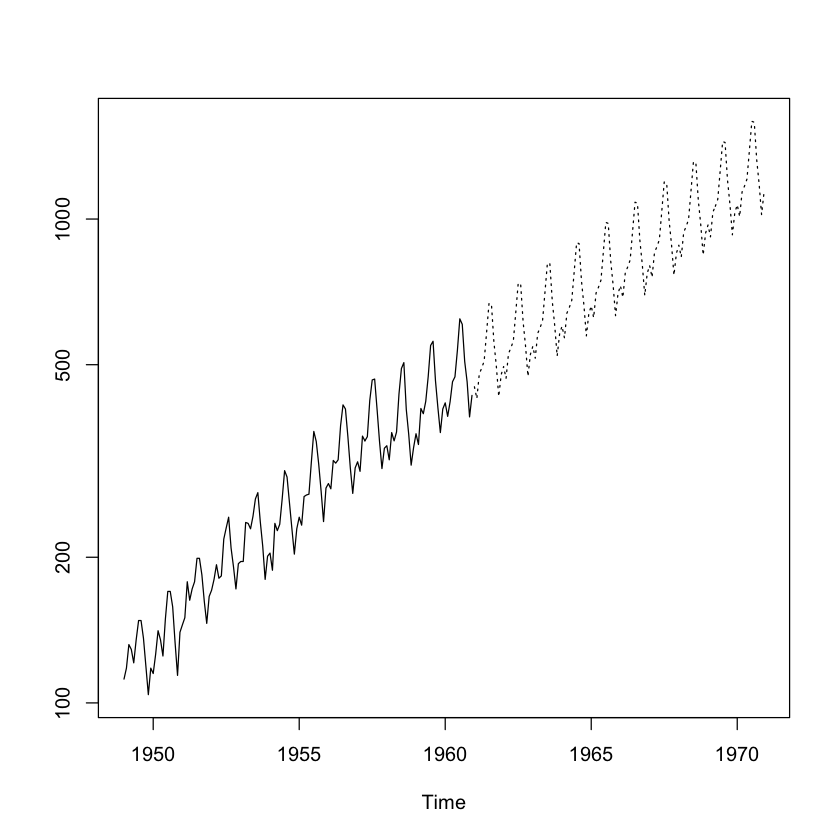

In [36]:
ts.plot(aps,2.718^prediction$pred, log="y", lty=c(1,3))

In [38]:
library(fUnitRoots)
adfTest(aps)
adfTest(log(aps))
adfTest(diff(log(aps)))


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.3524
  P VALUE:
    0.5017 

Description:
 Thu Dec 22 13:54:31 2016 by user: 



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: 0.674
  P VALUE:
    0.8289 

Description:
 Thu Dec 22 13:54:31 2016 by user: 


Warning message in adfTest(diff(log(aps))):
“p-value smaller than printed p-value”


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -8.8157
  P VALUE:
    0.01 

Description:
 Thu Dec 22 13:54:31 2016 by user: 
